In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import time
%matplotlib inline

In [2]:
df = pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'], index_col='time_stamp')
df.sort_index(inplace = True)
df.head()

,user_id,visited
time_stamp,,
2012-05-31 08:20:06,10012,1
2012-05-31 15:47:36,3428,1
2012-05-31 17:19:37,9899,1
2012-05-31 21:58:33,1693,1
2012-06-01 00:17:30,6102,1


In [3]:
df1=df.reset_index()
df1.sort_values('user_id', inplace=True)
df1.shape


(207917, 3)

In [4]:
# find out the users having 3 or more logins
adopted_user = df1.groupby('user_id', as_index=False).count()
adopted_user = adopted_user[adopted_user.visited>2]
adopted_user.head()

,user_id,time_stamp,visited
1,2,14,14
7,10,284,284
13,20,7,7
24,33,18,18
28,42,342,342


In [5]:
# assign the flag to 1 which has 3 or more logins
adopted_user['adopted_user']=1
adopted_user= adopted_user.drop(['time_stamp','visited'],axis=1, errors='ignore')
adopted_user.head()

,user_id,adopted_user
1,2,1
7,10,1
13,20,1
24,33,1
28,42,1


In [6]:
login_df = pd.merge(df1,adopted_user,on='user_id', how='left')
login_df.adopted_user.fillna(0, inplace=True)
login_df.head()
                 

,time_stamp,user_id,visited,adopted_user
0,2014-04-22 03:53:30,1,1,0.0
1,2014-03-31 03:45:04,2,1,1.0
2,2014-02-03 03:45:04,2,1,1.0
3,2013-11-15 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0


In [7]:
login_df['login_date'] = login_df['time_stamp'].dt.date
login_df = login_df.drop(['time_stamp'], axis=1)
login_df.head()             

,user_id,visited,adopted_user,login_date
0,1,1,0.0,2014-04-22
1,2,1,1.0,2014-03-31
2,2,1,1.0,2014-02-03
3,2,1,1.0,2013-11-15
4,2,1,1.0,2013-12-25


In [8]:
login_df.sort_values(['user_id', 'login_date'], inplace=True)

In [9]:
# function for findning adoptive user which has atleast 3 logins in any 7 day periods
def adopted_user(login_date_list):
    adopt_flag =0
    time1 = login_date_list[0] 
    time2 = login_date_list[1]
    time3 = login_date_list[2]
    timeDif = (time3 - time2).days
   
    if(timeDif < 7):
        adopt_flag =1
        
    if((len(login_date_list) > 3) & (adopt_flag==0)):
        for index, elem in enumerate(login_date_list):
            if(index > 2):
                time1 = time2
                time2 = time3
                time3 = elem
                timeDif = (time3 - time2).days
                if(timeDif < 7):
                    adopt_flag =1
                    break;
                else:
                    continue;
    return adopt_flag

In [12]:
# create a list of unique users having 3 at least 3 logins
df_log_user=login_df[login_df.adopted_user==1]
df_log_user=df_log_user.drop_duplicates('user_id')
user_list=df_log_user['user_id'].tolist()
len(user_list)

2248

In [13]:
#Create a list of users for adoptive users flag
adflag_list=[]
for elem in user_list:
    adflag = adopted_user(login_df[login_df.user_id==elem]['login_date'].tolist())
    adflag_list.append(adflag)
print(len(adflag_list))
print(len(user_list))

2248
2248


In [14]:
# create a column with flag values
df_log_user['adoptedUserFlag']=adflag_list

In [15]:
df_log_user = df_log_user.drop(['adopted_user','visited'], axis=1)
df_log_user.head()

,user_id,login_date,adoptedUserFlag
3,2,2013-11-15,1
230,10,2013-01-16,1
313,20,2014-03-11,1
332,33,2014-03-11,1
630,42,2012-11-13,1


In [16]:
df_user = pd.read_csv('takehome_users.csv', parse_dates=['creation_time'], index_col='creation_time',encoding='latin-1',)
df_user.head()

,object_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
creation_time,,,,,,,,,
2014-04-22 03:53:30,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
2013-11-15 03:45:04,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2013-03-19 23:14:52,3,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
2013-05-21 08:09:28,4,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
2013-01-17 10:14:20,5,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [17]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12000 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 9 columns):
object_id                     12000 non-null int64
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 937.5+ KB


In [18]:
df_user.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [19]:
df_user.describe(include=['object'])

,name,email,creation_source
count,12000,12000,12000
unique,11355,11980,5
top,Araujo Gabriela,KlausMueller@gustr.com,ORG_INVITE
freq,5,2,4254


In [20]:
df_user.last_session_creation_time.isnull().sum()

3177

In [21]:
time.strftime("%D %H:%M", time.localtime(int("1284101485")))

'09/10/10 02:51'

In [22]:
df_user.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

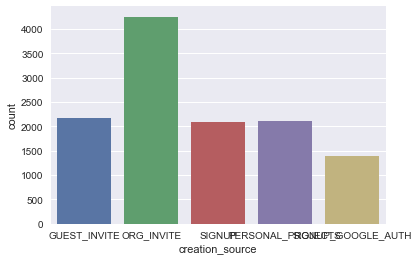

In [23]:
sns.countplot('creation_source', data=df_user)

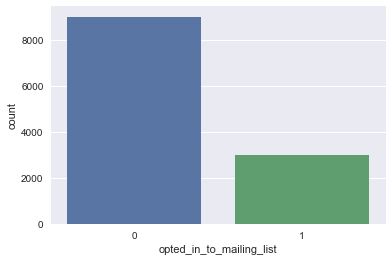

In [24]:
sns.countplot('opted_in_to_mailing_list', data=df_user)

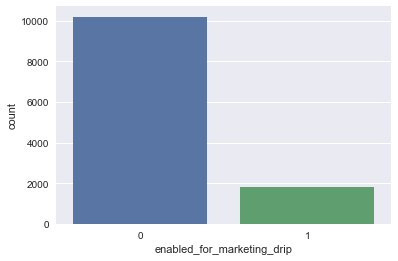

In [25]:
sns.countplot('enabled_for_marketing_drip', data=df_user)